<a href="https://colab.research.google.com/github/hanglee1711/Product-Analysis/blob/main/Product_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Online Retail.xlsx')

In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df[['InvoiceNo','StockCode']].duplicated().sum() - df.duplicated().sum()

5416

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df[df[['CustomerID','InvoiceNo','StockCode']].duplicated()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [9]:
df[((df['CustomerID']==17908.0)&(df['InvoiceNo']==536409)&(df['StockCode']=='90199C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom


In [10]:
df.Quantity.describe()

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [11]:
df[df['Quantity']<0].shape[0]

10624

In [12]:
df[df['Quantity']<0].InvoiceNo.str.startswith('C').value_counts(dropna=False)

,count
InvoiceNo,
True,9288
NaN,1336


In [13]:
df[df['Quantity']<0][df[df['Quantity']<0].InvoiceNo.str.startswith('C').isnull()].Description.value_counts()

,count
Description,
check,120
damages,45
damaged,42
?,41
sold as set on dotcom,20
...,...
POSSIBLE DAMAGES OR LOST?,1
"MERCHANT CHANDLER CREDIT ERROR, STO",1
mystery! Only ever imported 1800,1


<Axes: >

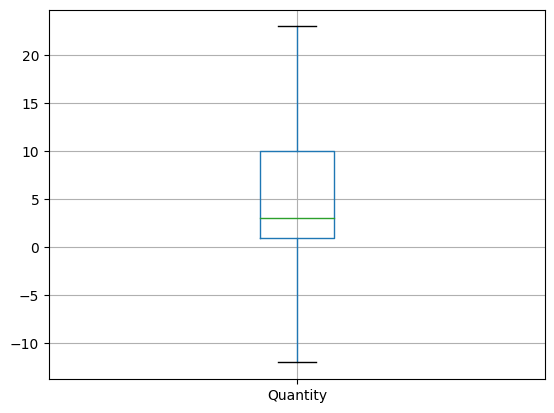

In [14]:
df.boxplot('Quantity',showfliers=False)

In [15]:
df['OrderCancel'] = df['InvoiceNo'].str.startswith('C')
df[df['Quantity']<0]['OrderCancel'].value_counts(dropna=False)

,count
OrderCancel,
True,9288
NaN,1336


In [16]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
OrderCancel,532618


#**DATA CLEANING**

In [17]:
# df = df.drop_duplicates()
df = df.drop_duplicates(subset = ['InvoiceNo','StockCode','Quantity'])
df = df[df['CustomerID'].notnull()]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[df['Quantity'] > 0]
df.shape

<ipython-input-17-9db4d0c7874e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


(392707, 9)

#**TIME SERIES TRENDS ANALYSIS**

In [18]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [19]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [20]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN


In [21]:
df['order_year_month'] = df['InvoiceDate'].dt.strftime('%Y-%m')

<Axes: xlabel='order_year_month'>

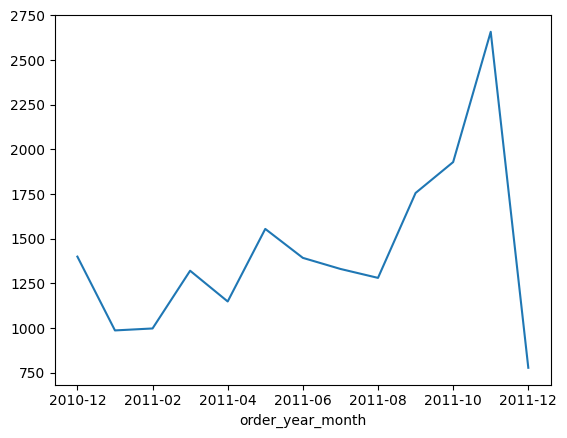

In [22]:
df.groupby('order_year_month').InvoiceNo.nunique().plot()

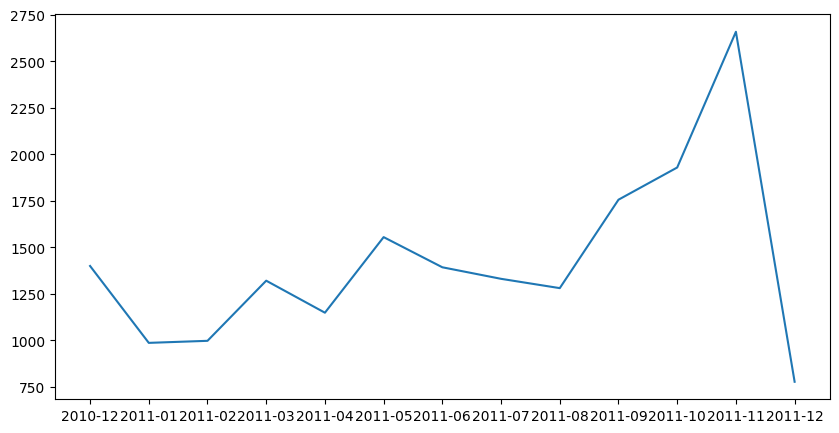

In [27]:
plt.figure(figsize=[10,5])
plt.plot(df.groupby('order_year_month').InvoiceNo.nunique())

Text(0, 0.5, 'number of orders')

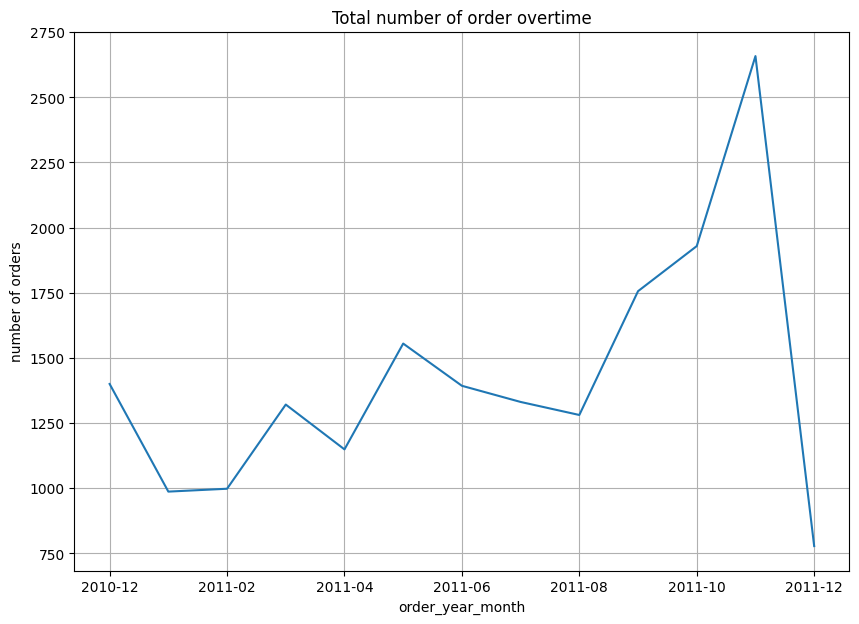

In [28]:
ax = df.groupby('order_year_month').InvoiceNo.nunique().plot(figsize=(10,7),grid=True)
ax.set_title('Total number of order overtime')
ax.set_ylabel('number of orders')

In [29]:
df[df['order_year_month']=='2011-12']['InvoiceDate'].min(),df[df['order_year_month']=='2011-12']['InvoiceDate'].max()

(Timestamp('2011-12-01 08:33:00'), Timestamp('2011-12-09 12:50:00'))

In [30]:
###Filter out incomplete data for December 2011
df = df[df['order_year_month']<'2011-12']

<Axes: xlabel='order_year_month'>

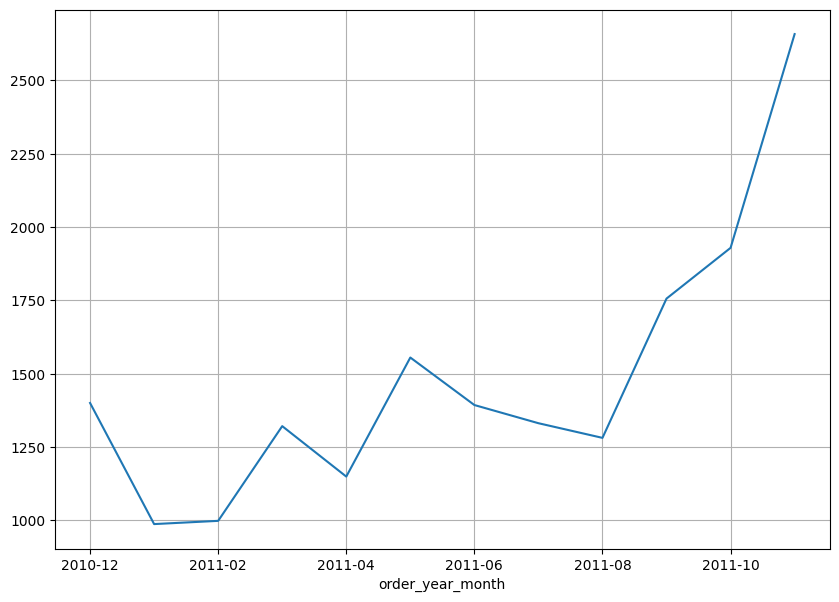

In [31]:

df.groupby('order_year_month').InvoiceNo.nunique().plot(grid=True,figsize=(10,7))

In [32]:
sale_df = df.groupby('order_year_month').InvoiceNo.nunique().reset_index()
sale_df.columns = ['OrderDate','Quantity']

In [36]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'OrderCancel',
       'order_year_month'],
      dtype='object')

In [37]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
revenu_df = df.groupby('order_year_month')['Revenue'].sum().reset_index()
revenu_df.columns = ['OrderDate','Revenue']

In [38]:
sale_df = sale_df.merge(revenu_df,on='OrderDate',how='left')
sale_df

,OrderDate,Quantity,Revenue
0,2010-12,1400,570158.050
1,2011-01,987,568101.310
2,2011-02,998,446084.920
3,2011-03,1321,593617.960
4,2011-04,1149,464499.161
5,2011-05,1555,677340.300
6,2011-06,1393,660046.050
7,2011-07,1331,598962.051
8,2011-08,1281,643801.040
9,2011-09,1756,950678.021


In [39]:
sale_df.to_csv('sales.csv',index=False)

Visualize Montly Revenue Data

Text(0.5, 0, 'Date')

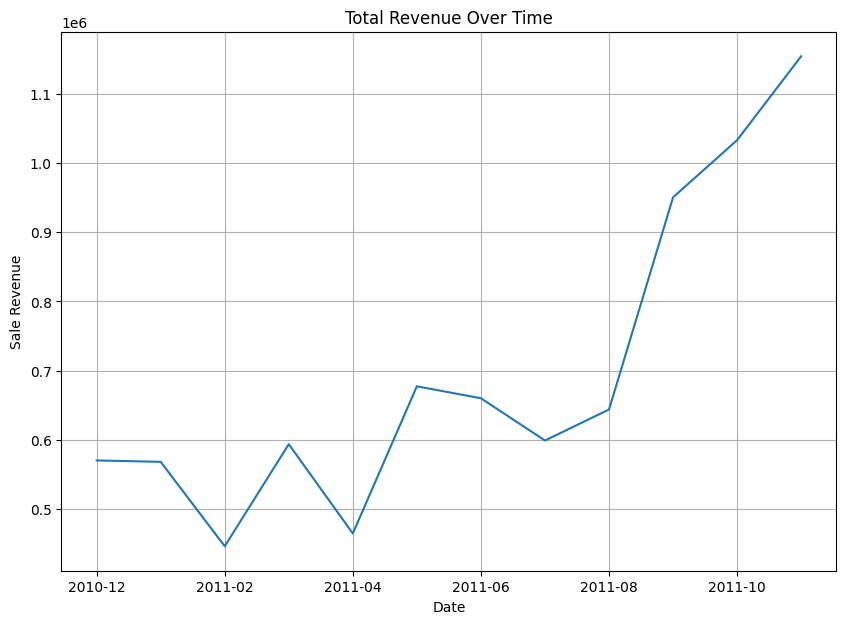

In [40]:
df['Revenue'] = df['Quantity']*df['UnitPrice']
ax = df.groupby('order_year_month').Revenue.sum().plot(figsize=(10,7),grid=True)
ax.set_title('Total Revenue Over Time')
ax.set_ylabel('Sale Revenue')
ax.set_xlabel('Date')

#**Repeat Purchases Analysis**

In [41]:
####Calculate montly repeat purchases
grouped_df = df.groupby(['order_year_month','CustomerID'])['InvoiceNo'].nunique().reset_index()
repeat_customer_df = grouped_df[grouped_df['InvoiceNo']>=2].groupby('order_year_month').CustomerID.count().reset_index()
repeat_customer_df.columns=['orderDate','nbr_repeat_customers']

In [42]:
repeat_customer_df

,orderDate,nbr_repeat_customers
0,2010-12,263
1,2011-01,149
2,2011-02,150
3,2011-03,201
4,2011-04,168
5,2011-05,279
6,2011-06,219
7,2011-07,227
8,2011-08,196
9,2011-09,271


In [43]:
full_customer_df = grouped_df.groupby('order_year_month')\
.CustomerID.count().reset_index()
full_customer_df.columns = ['orderDate','nbr_customer']

In [44]:
full_customer_df.columns

Index(['orderDate', 'nbr_customer'], dtype='object')

In [45]:
repeat_customer_df = repeat_customer_df.merge(full_customer_df,on='orderDate',how='left')

In [46]:
repeat_customer_df

,orderDate,nbr_repeat_customers,nbr_customer
0,2010-12,263,885
1,2011-01,149,741
2,2011-02,150,758
3,2011-03,201,974
4,2011-04,168,856
5,2011-05,279,1056
6,2011-06,219,991
7,2011-07,227,949
8,2011-08,196,935
9,2011-09,271,1266


In [47]:
repeat_customer_df['repeated_cst_pct'] = round(100*(repeat_customer_df['nbr_repeat_customers']\
                                                    /repeat_customer_df['nbr_customer']),2)

In [48]:
repeat_customer_df

,orderDate,nbr_repeat_customers,nbr_customer,repeated_cst_pct
0,2010-12,263,885,29.72
1,2011-01,149,741,20.11
2,2011-02,150,758,19.79
3,2011-03,201,974,20.64
4,2011-04,168,856,19.63
5,2011-05,279,1056,26.42
6,2011-06,219,991,22.10
7,2011-07,227,949,23.92
8,2011-08,196,935,20.96
9,2011-09,271,1266,21.41


In [49]:
grouped_df = df.groupby(['order_year_month','CustomerID'])\
.agg({'InvoiceNo':'nunique','Revenue':'sum'}).reset_index()

In [50]:
grouped_df

,order_year_month,CustomerID,InvoiceNo,Revenue
0,2010-12,12347.0,1,711.79
1,2010-12,12348.0,1,892.80
2,2010-12,12370.0,2,1864.27
3,2010-12,12377.0,1,1001.52
4,2010-12,12383.0,1,600.72
...,...,...,...,...
12435,2011-11,18259.0,1,1070.40
12436,2011-11,18263.0,1,401.76
12437,2011-11,18270.0,1,171.20
12438,2011-11,18274.0,1,175.92


In [51]:
repeat_revenue_df = grouped_df[grouped_df['InvoiceNo']>=2]\
.groupby('order_year_month').Revenue.sum().reset_index()
repeat_revenue_df.columns = ['orderDate','repeat_customer_revenue']
full_revenue_df =  grouped_df.groupby('order_year_month')\
.Revenue.sum().reset_index()
full_revenue_df.columns=['orderDate','revenue']
repeat_revenue_df = repeat_revenue_df.merge(full_revenue_df,on='orderDate',how='left')
repeat_revenue_df['repeat_customer_revenue_contribution'] = round(100*(repeat_revenue_df['repeat_customer_revenue']\
                                                                 /repeat_revenue_df['revenue']),2)

In [52]:
repeat_revenue_df

,orderDate,repeat_customer_revenue,revenue,repeat_customer_revenue_contribution
0,2010-12,357849.24,570158.050,62.76
1,2011-01,218953.76,568101.310,38.54
2,2011-02,189736.82,446084.920,42.53
3,2011-03,265870.64,593617.960,44.79
4,2011-04,190655.38,464499.161,41.05
5,2011-05,377475.69,677340.300,55.73
6,2011-06,375475.61,660046.050,56.89
7,2011-07,317018.05,598962.051,52.93
8,2011-08,315360.14,643801.040,48.98
9,2011-09,495938.13,950678.021,52.17


In [53]:
repeat_customer_df

,orderDate,nbr_repeat_customers,nbr_customer,repeated_cst_pct
0,2010-12,263,885,29.72
1,2011-01,149,741,20.11
2,2011-02,150,758,19.79
3,2011-03,201,974,20.64
4,2011-04,168,856,19.63
5,2011-05,279,1056,26.42
6,2011-06,219,991,22.10
7,2011-07,227,949,23.92
8,2011-08,196,935,20.96
9,2011-09,271,1266,21.41


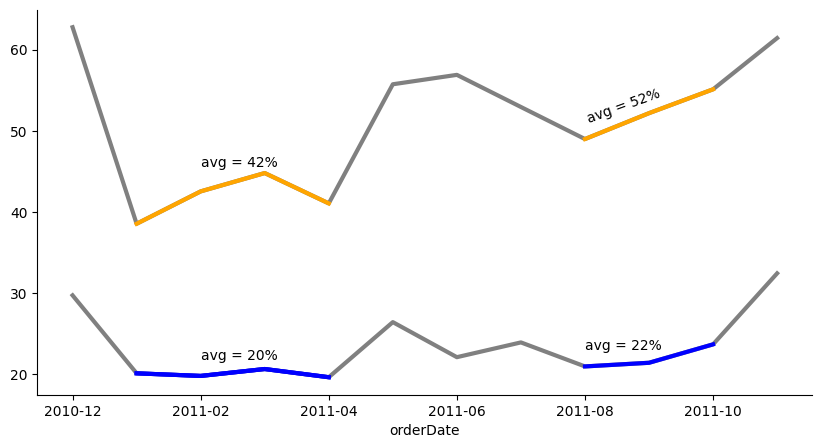

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the repeated customer percentage
repeat_customer_df[['orderDate', 'repeated_cst_pct']].set_index('orderDate')\
    .plot(kind='line', ax=ax, linewidth=3, color='grey')

# Plotting the repeat customer revenue contribution
repeat_revenue_df[['orderDate', 'repeat_customer_revenue_contribution']].set_index('orderDate')\
    .plot(kind='line', ax=ax, color='grey', linewidth=3)

ax.get_legend().remove()

# Getting lines after plotting
lines = ax.lines

# Plotting specific segments in blue
xdata2 = lines[0].get_xdata()[1:5]
ydata2 = lines[0].get_ydata()[1:5]
ax.plot(xdata2, ydata2, color='blue', linewidth=3)

xdata2 = lines[0].get_xdata()[[1, 2, 3, 4]]
ydata2 = lines[0].get_ydata()[[1, 2, 3, 4]]
ax.plot(xdata2, ydata2, color='blue', linewidth=3)

xdata2 = lines[0].get_xdata()[[8, 9, 10]]
ydata2 = lines[0].get_ydata()[[8, 9, 10]]
ax.plot(xdata2, ydata2, color='blue', linewidth=3)

# Plotting specific segments in orange
xdata2 = lines[1].get_xdata()[[1, 2, 3, 4]]
ydata2 = lines[1].get_ydata()[[1, 2, 3, 4]]
ax.plot(xdata2, ydata2, color='orange', linewidth=3)

xdata2 = lines[1].get_xdata()[[8, 9, 10]]
ydata2 = lines[1].get_ydata()[[8, 9, 10]]
ax.plot(xdata2, ydata2, color='orange', linewidth=3)

# Hide top and right spines
ax.spines[['top', 'right']].set_visible(False)

# Annotating average values
xdata = lines[0].get_xdata()[2]
ydata = lines[0].get_ydata()[2]
ax.text(xdata, ydata + 2, 'avg = 20%')

xdata = lines[0].get_xdata()[8]
ydata = lines[0].get_ydata()[8]
ax.text(xdata, ydata + 2, 'avg = 22%')

xdata = lines[1].get_xdata()[2]
ydata = lines[1].get_ydata()[2]
ax.text(xdata, ydata + 3, 'avg = 42%')

xdata = lines[1].get_xdata()[8]
ydata = lines[1].get_ydata()[8]
ax.text(xdata, ydata + 2, 'avg = 52%', rotation=20)

plt.show()


Insight: Tỷ lệ % repeat customers giai đoạn 4 tháng đầu năm và 3 tháng 8, 9, 10 dao động 20%,
có xu hướng tăng mạnh vào các tháng cuối năm. Tuy nhiên ở giai đoạn đầu năm 20% repeat customers chỉ mang lại tối đa 44.83% doanh thu,
ngược lại ở giai đoạn sau mặc dù tỷ lệ khách hàng trung thành cũng chỉ chiếm có 22% nhưng doanh thu mang lai lên tới 52%.
Như vậy 1% repeat customer tăng thêm trong giai đoạn này giúp tăng thêm 5% doanh thu.
ACTION: đưa ra các gói kích thích khách hàng cũ mua hàng trong giai đoạn này.

#**Trending items over time**

In [56]:
data_item_df = df.groupby(['order_year_month','StockCode']).Quantity.sum().reset_index()

In [57]:
# Rank items by the last month sales
data_item_df[data_item_df['order_year_month']=='2011-11'].sort_values(by='Quantity',ascending=False)

,order_year_month,StockCode,Quantity
27691,2011-11,84826,12551
27069,2011-11,23084,12352
26329,2011-11,22197,8450
26240,2011-11,22086,5909
28087,2011-11,85099B,5677
...,...,...,...
25663,2011-11,20847,1
27854,2011-11,35910B,1
27856,2011-11,35913B,1
26891,2011-11,22870,1


In [58]:
best_seller_items = [23084,84826,22197,22086,'85099B']
trending_items_df = df[df['StockCode'].isin(best_seller_items)]\
.groupby(['order_year_month','StockCode']).Quantity.sum()

Text(0.5, 1.0, 'Item Trends over Time')

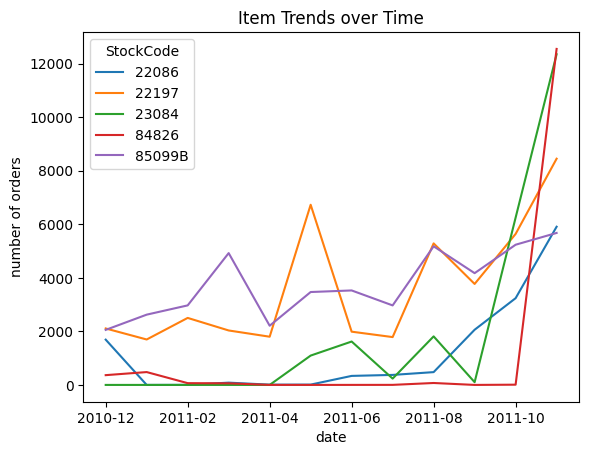

In [59]:
ax = trending_items_df.unstack().fillna(0).plot()
ax.set_ylabel('number of orders')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

Text(0.5, 1.0, 'Item Trends over Time')

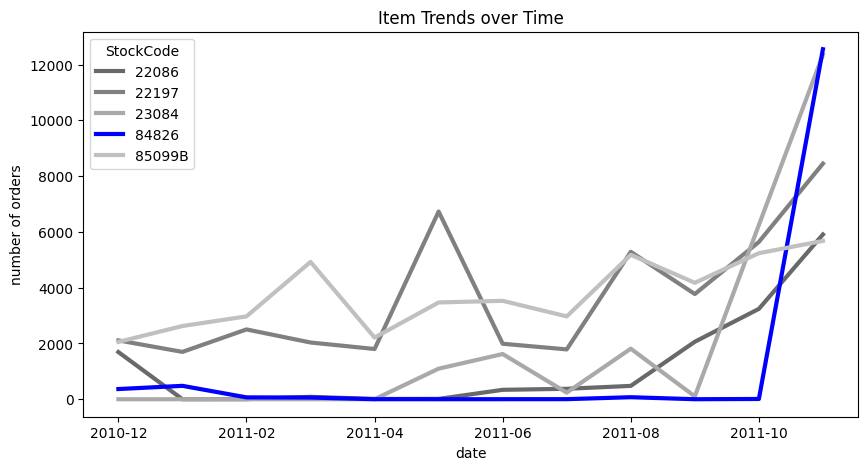

In [60]:
ax = trending_items_df.unstack().fillna(0).plot(color=['dimgray','grey','darkgray','Blue','silver'],figsize=[10,5],linewidth=3)
ax.set_ylabel('number of orders')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

Text(0.5, 1.0, 'Item Revenue per month')

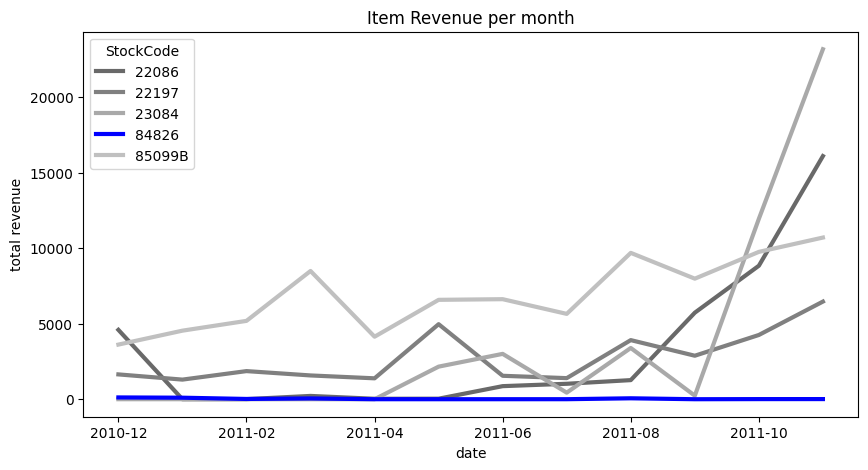

In [61]:
trending_items_Revenue_df = df[df['StockCode'].isin(best_seller_items)].groupby(['order_year_month','StockCode']).Revenue.sum()
ax = trending_items_Revenue_df.unstack().fillna(0).plot(color=['dimgray','grey','darkgray','Blue','silver'],figsize=[10,5],linewidth=3)
ax.set_ylabel('total revenue')
ax.set_xlabel('date')
ax.set_title('Item Revenue per month')

In [62]:
df[((df['StockCode']==84826)&(df['order_year_month']=='2011-11'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,order_year_month,Revenue
452377,575336,84826,ASSTD DESIGN 3D PAPER STICKERS,4,2011-11-09 13:58:00,0.85,14968.0,United Kingdom,NaN,2011-11,3.40
452421,575337,84826,ASSTD DESIGN 3D PAPER STICKERS,5,2011-11-09 14:11:00,0.85,17867.0,United Kingdom,NaN,2011-11,4.25
452454,575337,84826,ASSTD DESIGN 3D PAPER STICKERS,1,2011-11-09 14:11:00,0.85,17867.0,United Kingdom,NaN,2011-11,0.85
458281,575767,84826,ASSTD DESIGN 3D PAPER STICKERS,1,2011-11-11 11:11:00,0.85,17348.0,United Kingdom,NaN,2011-11,0.85
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,NaN,2011-11,0.00


In [63]:
df['dayinweek'] = df['InvoiceDate'].dt.weekday

In [64]:
df['dayinweek'].value_counts()

,count
dayinweek,
3,74638
2,65903
1,63240
0,60894
6,59325
4,51681


([<matplotlib.axis.XTick at 0x7e3a7631ded0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wenesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

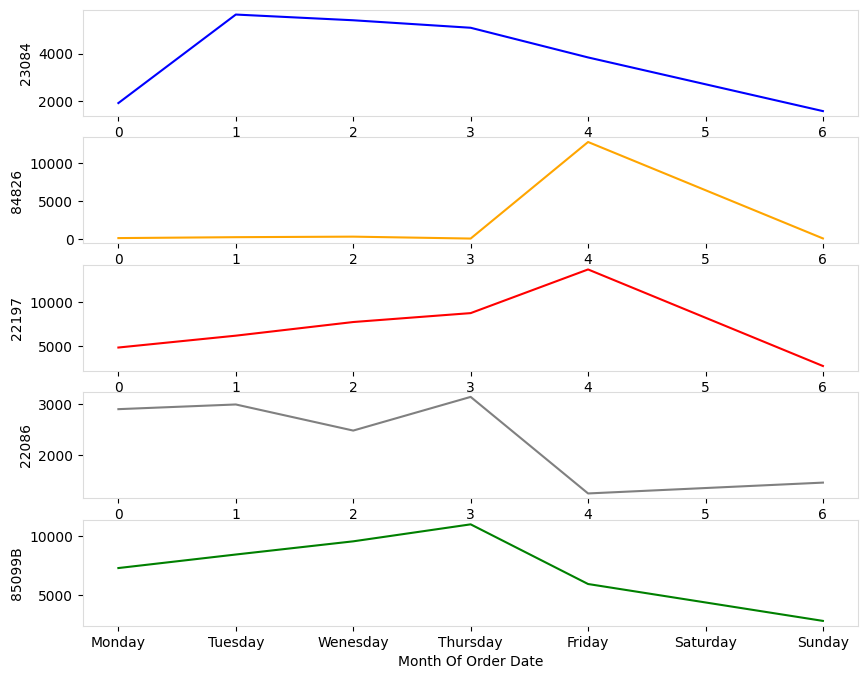

In [65]:
#### san pham nao nen ban vao thoi gian nao?Phai loai bo cac san pham co discount hoac trong chien dich campaign.
fig,ax = plt.subplots(5,1,figsize=(10,8))
i=0
colors =['blue','orange','red','grey','green']
for ax1 in ax:
    df[df['StockCode']==best_seller_items[i]].groupby('dayinweek')['Quantity'].sum()\
    .plot(kind='line',ax=ax1,color=colors[i])
    ax1.spines[['bottom','top','left','right']].set_color('#DCDCDC')
    ticks = ax1.get_xticks()
    ax1.set_xlabel('')
#     ax1.set_xticklabels(['Monday','Tuesday','Wenesday','Thursday','Friday','Saturday','Sunday'])
    ax1.set_ylabel(best_seller_items[i])
    i+=1
ax1.set_xlabel('Month Of Order Date')
plt.xticks(range(7),['Monday','Tuesday','Wenesday','Thursday','Friday','Saturday','Sunday'])

In [66]:
df['day'] = df['InvoiceDate'].dt.day
df['day'].value_counts()

,count
day,
6,15576
17,14730
20,14404
23,14093
14,14013
13,14005
10,13931
28,13321
7,13294


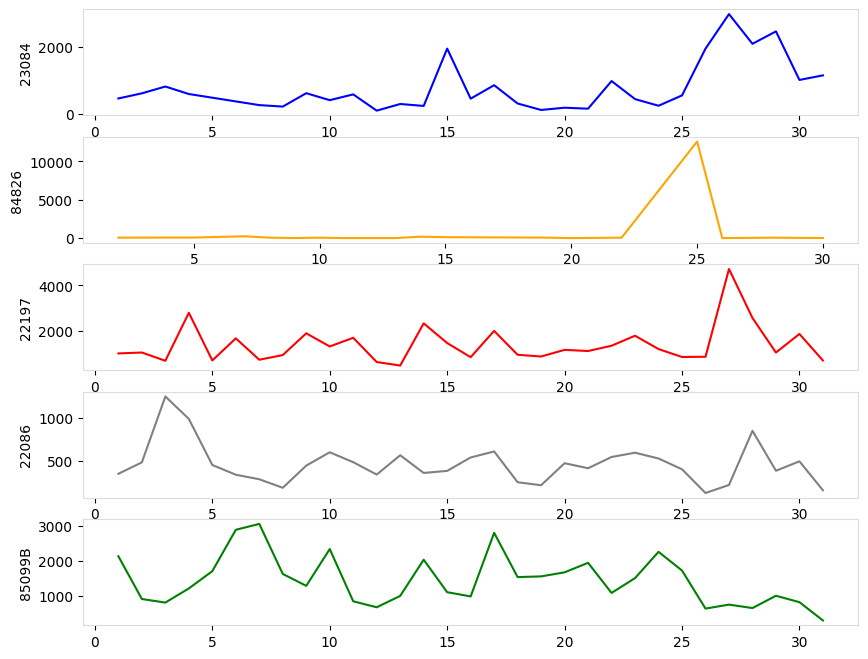

In [67]:
fig,ax = plt.subplots(5,1,figsize=(10,8))
i=0
colors =['blue','orange','red','grey','green']
for ax1 in ax:
    df[df['StockCode']==best_seller_items[i]].groupby('day')['Quantity'].sum()\
    .plot(kind='line',ax=ax1,color=colors[i])
    ax1.spines[['bottom','top','left','right']].set_color('#DCDCDC')
    ticks = ax1.get_xticks()
    ax1.set_xlabel('')
#     ax1.set_xticklabels(['Monday','Tuesday','Wenesday','Thursday','Friday','Saturday','Sunday'])
    ax1.set_ylabel(best_seller_items[i])
    i+=1